In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column


In [2]:
########################################################
def genZP(table, reject=[], weird=[], clusterName='', 
               nest=''):
    
    ctl   = np.genfromtxt('zp_photom_reduced.csv' , delimiter='|', filling_values=-1, 
                          names=True, dtype=None, encoding=None)
    PGC  = ctl['PGC']
    dist = ctl['d']
    ID   = ctl['Name']
    
    pgc  = table['pgc']
    Vhel = table['Vhel']
    Vls  = table['Vls']
    
   
    pgc_  = []
    Vhel_ = []
    Vls_  = []
    dist_ = []
    ID_   = []
    
    for i, idd in enumerate(pgc):
        if idd in PGC and not idd in reject:
            
            indx, = np.where(PGC==idd)
            pgc_.append(pgc[i])
            Vhel_.append(Vhel[i])
            Vls_.append(Vls[i])
            dist_.append(dist[indx][0])
            ID_.append(ID[indx][0])
    
    dist_=np.asarray(dist_)
    ID_=np.asarray(ID_)    
    Vhel_ = np.asarray(Vhel_)
    Vls_ = np.asarray(Vls_)
    
            

    outDict = {'pgc':pgc_, 'name': clusterName, 'Vhel': Vhel_, 'Vls': Vls_, 'dist':dist_, 'ID':ID_}
    
    return outDict

def ZP4Vmod(table):
    reject = []
    weird = []
    return genZP(table, reject=reject, weird=weird)
    
########################################################
def genCluster(table, reject=[], weird=[], clusterName='', 
               nest='NEST_100001'):
    
    ctl   = np.genfromtxt(nest+'.csv' , delimiter='|', filling_values=-1, 
                          names=True, dtype=None, encoding=None)
    PGC = ctl['PGC']
    
    pgc  = table['pgc']
    Vhel = table['Vhel']
    Vls  = table['Vls']
   
    pgc_ = []
    Vhel_ = []
    Vls_ = []
    
    for i, idd in enumerate(pgc):
        if idd in PGC and not idd in reject:
            pgc_.append(pgc[i])
            Vhel_.append(Vhel[i])
            Vls_.append(Vls[i])
    
    Vhel_ = np.asarray(Vhel_)
    Vls_ = np.asarray(Vls_)
            

    outDict = {'pgc':pgc_, 'name': clusterName, 'Vhel': Vhel_, 'Vls': Vls_}
    
    return outDict


########################################################
def clusters4Vmod(table):
    
    Clusters = {}
    
    addSouth=True

    reject = [43164,44405,93666]
    weird = [43511]
    myDict = genCluster(table, nest='NEST_100001', clusterName='Coma', 
                        reject=reject, weird=weird)
    Clusters['NEST_100001'] = myDict

    reject = []
    weird = [41440, 40809]
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Virgo', nest='NEST_100002')
    Clusters['NEST_100002'] = myDict


    ### SOUTH
    if addSouth:
        reject = []
        weird = []
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Centaurus', nest='NEST_100003')
        Clusters['NEST_100003'] = myDict

    reject = [36323,36328,36330,36608,200155]
    weird = [37140]
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 1367', nest='NEST_100005')
    Clusters['NEST_100005'] = myDict


    ### SOUTH
    if addSouth:
        reject = []
        weird = [31500]
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Hydra', nest='NEST_100006')
        Clusters['NEST_100006'] = myDict

    reject = [56977,2790835]
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 2151 (Hercules)', nest='NEST_100007')
    Clusters['NEST_100007'] = myDict


    reject = [37550]
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Ursa Major', nest='NEST_100008')
    Clusters['NEST_100008'] = myDict

    ### SOUTH
    if addSouth:
        reject = []
        weird = []
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Antlia', nest='NEST_100014')
        Clusters['NEST_100014'] = myDict

    reject = [38333]
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC4065', nest='NEST_100018')
    Clusters['NEST_100018'] = myDict

    reject = [23308]
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Cancer', nest='NEST_100030')
    Clusters['NEST_100030'] = myDict

    #reject = [39655] 
    #weird = []
    #myDict = genCluster(table, reject=reject, weird=weird, 
               #clusterName='Virgo W', nest='NEST_120002')
    #Clusters['NEST_120002'] = myDict

    reject = [] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 262', nest='NEST_200003')
    Clusters['NEST_200003'] = myDict

    reject = [3446,4020] 
    weird = [1904373]
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC410', nest='NEST_200005')
    Clusters['NEST_200005'] = myDict

    reject = [4740,4876,5008] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC507', nest='NEST_200006')
    Clusters['NEST_200006'] = myDict

    ### SOUTH
    if addSouth:
        reject = [] 
        weird = []
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Fornax', nest='NEST_200015')
        Clusters['NEST_200015'] = myDict

    reject = [11150,11199,138562,3647754] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 400', nest='NEST_200012')
    Clusters['NEST_200012'] = myDict

    reject = [85526,85643,90431,197699] 
    weird = [5057398]
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 2634/66', nest='NEST_200016')
    Clusters['NEST_200016'] = myDict

    ### SOUTH
    if addSouth:
        reject = [] 
        weird = []
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Abell 539', nest='NEST_200017')
        Clusters['NEST_200017'] = myDict

    reject = [1724] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC70', nest='NEST_200037')
    Clusters['NEST_200037'] = myDict

    reject = [90474] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC80', nest='NEST_200045')
    Clusters['NEST_200045'] = myDict

    reject = [70712, 70998, 71360] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Pegasus', nest='NEST_200092')
    Clusters['NEST_200092'] = myDict
    
    return Clusters
########################################################

In [3]:
table   = np.genfromtxt('corrected_mags_linewidth_all.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

Vmod_Clusters = clusters4Vmod(table)

Vmod_zp = ZP4Vmod(table)

In [4]:
table   = np.genfromtxt('../EDD_distance_cf4_v27.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

ID  = table['pgc']
RA  = table['ra']
DEC = table['dec']
GL  = table['gl']
GB  = table['gb']
SGL = table['sgl']
SGB = table['sgb']
VHEL = table['Vhel']
VLS  = table['Vls']

c Galactic coordinates l,b
        cosb=cos(b*0.017453)
        sinb=sin(b*0.017453)
        cosl=cos(el*0.017453)
        sinl=sin(el*0.017453)
c Fixsen et al. 1996 (CMB)
        v3k=float(ivh)-25.2*cosl*cosb-245.7*sinl*cosb+276.8*sinb
c Tully 2008 (Local Sheet)
        vls=float(ivh)-26.*cosl*cosb+317.*sinl*cosb-8.*sinb
c van der Marel 2012 (GSR)
        vgsrm=float(ivh)+11.1*cosl*cosb+251.*sinl*cosb+7.25*sinb
c Cosmological adjustments to CMB velocities; vanilla LCDM model 
      omegam=0.27
      omegal=1.-omegam
      c=299800.
        z=v3k/c
      q0=0.5*(omegam-2.*omegal)
      fmod=1.+0.5*(1.-q0)*z-(1./6)*(1.-q0-3.*q0**2+1.)*z**2
      vmod=c*z*fmod
c

In [5]:
def Vh2V3k(el,b, Vh):
  
    alpha = np.pi / 180.
    cosb = np.cos(b*alpha)
    sinb = np.sin(b*alpha)
    cosl = np.cos(el*alpha)
    sinl = np.sin(el*alpha)
    
    v3k = float(Vh)-25.2*cosl*cosb-245.7*sinl*cosb+276.8*sinb

    return v3k

In [6]:
import astropy.stats as st


def get_ZP_Vmod(Vmod_ZP):
    
#     key = 'NEST_100002'


    Vls  = Vmod_ZP['Vls']
    Vhel = Vmod_ZP['Vhel']
    pgc  = Vmod_ZP['pgc']

    N = len(pgc)
    ra  = np.zeros(N)
    dec = np.zeros(N)
    gl  = np.zeros(N)
    gb  = np.zeros(N)
    sgl = np.zeros(N)
    sgb = np.zeros(N)
    V3k = np.zeros(N)

    for i, idd in enumerate(pgc):

        if idd in ID:
            indx, = np.where(ID==idd)
            j = indx[0]

            ra[i]  = RA[j]
            dec[i] = DEC[j]
            gl[i]  = GL[j]
            gb[i]  = GB[j]
            sgl[i] = SGL[j]
            sgb[i] = SGB[j]
            V3k[i] = Vh2V3k(GL[j],GB[j], Vhel[i])


    omegam=0.27
    omegal=1.-omegam
    c=299800.
    z=V3k/c
#     ze = V3k_m_e/c
    q0=0.5*(omegam-2.*omegal)
    fmod=1.+0.5*(1.-q0)*z-(1./6)*(1.-q0-3.*q0**2+1.)*z**2
    Vmod=c*z*fmod
#     Vmod_e=c*ze*fmod

    return Vmod


NameError: name 'Vzp' is not defined

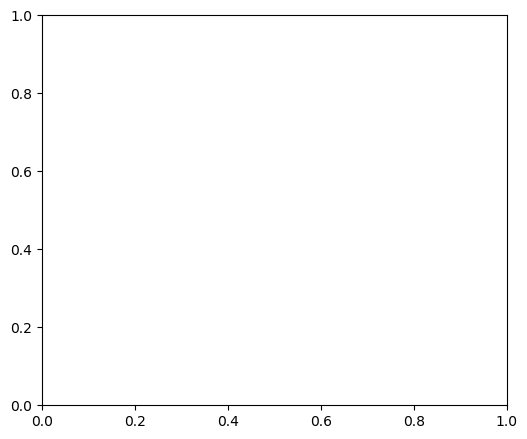

In [7]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


Vcmb =  get_ZP_Vmod(Vmod_zp)

Dzp = Vmod_zp['dist']
Vh = Vmod_zp['Vhel']
Vls = Vmod_zp['Vls']
print len(Vzp), len(Dzp)

ax.plot(Dzp, Vcmb/Dzp, 'r.')

x = np.linspace(0,50,100)
ax.plot(x,x*0+75, 'k:')

ax.set_ylim(-100,200)

In [ ]:
import astropy.stats as st


def getVmod(Vmod_Clusters, key):
    
#     key = 'NEST_100002'


    Vls = Vmod_Clusters[key]['Vls']
    Vhel = Vmod_Clusters[key]['Vhel']
    pgc = Vmod_Clusters[key]['pgc']

    N = len(pgc)
    ra  = np.zeros(N)
    dec = np.zeros(N)
    gl  = np.zeros(N)
    gb  = np.zeros(N)
    sgl = np.zeros(N)
    sgb = np.zeros(N)
    V3k = np.zeros(N)

    for i, idd in enumerate(pgc):

        if idd in ID:
            indx, = np.where(ID==idd)
            j = indx[0]

            ra[i]  = RA[j]
            dec[i] = DEC[j]
            gl[i]  = GL[j]
            gb[i]  = GB[j]
            sgl[i] = SGL[j]
            sgb[i] = SGB[j]
            V3k[i] = Vh2V3k(GL[j],GB[j], Vhel[i])


    Vls_m = st.biweight_location(Vls)
    Vls_m_e = np.sqrt(st.biweight_midvariance(Vls))/np.sqrt(len(Vls))

    V3k_m = st.biweight_location(V3k)
    V3k_m_e = np.sqrt(st.biweight_midvariance(V3k))/np.sqrt(len(V3k))


    omegam=0.27
    omegal=1.-omegam
    c=299800.
    z=V3k_m/c
    ze = V3k_m_e/c
    q0=0.5*(omegam-2.*omegal)
    fmod=1.+0.5*(1.-q0)*z-(1./6)*(1.-q0-3.*q0**2+1.)*z**2
    Vmod=c*z*fmod
    Vmod_e=c*ze*fmod

#     print Vls_m, Vls_m_e, V3k_m, V3k_m_e, Vmod, Vmod_e
    return Vmod, Vmod_e


In [ ]:
for key in Vmod_Clusters:
    Vmod, Vmod_e = getVmod(Vmod_Clusters, key)
    print key, Vmod_Clusters[key]['name'], '%.0f'%Vmod, '%.0f'%Vmod_e

In [ ]:
key = 'NEST_100002'


Vls = Vmod_Clusters[key]['Vls']
Vhel = Vmod_Clusters[key]['Vhel']
pgc = Vmod_Clusters[key]['pgc']

N = len(pgc)
ra  = np.zeros(N)
dec = np.zeros(N)
gl  = np.zeros(N)
gb  = np.zeros(N)
sgl = np.zeros(N)
sgb = np.zeros(N)
V3k = np.zeros(N)

for i, idd in enumerate(pgc):

    if idd in ID:
        indx, = np.where(ID==idd)
        j = indx[0]

        ra[i]  = RA[j]
        dec[i] = DEC[j]
        gl[i]  = GL[j]
        gb[i]  = GB[j]
        sgl[i] = SGL[j]
        sgb[i] = SGB[j]
        V3k[i] = Vh2V3k(GL[j],GB[j], Vhel[i])
        
        
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


ax.plot(sgl,sgb, 'ko')